In [1]:
import filterpy

In [1]:
import os
from math import *

import numpy as np
import pandas as pd
# import sklearn

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)
from sklearn.preprocessing import MinMaxScaler

# dropout

In [2]:
PLOT_FEATURE = not True
DROP_OUTLIERS = True
# drop outl
round_num_del = [1,2,3,4,5,6,7,8,9,10,11,12,13,
                 17,18,19,20,21,22,23,
                 24,35,46,112,223,334,386,375,364,
                 56,153,208,309,327,347,351,360,365,391
                ]
round_num_del = [i-1 for i in round_num_del]

train_df = pd.read_csv('./data/train_feature_df.csv')
if DROP_OUTLIERS:
    train_df.drop(round_num_del,axis = 0,inplace = True)
train_df = train_df.loc[train_df['temperature']>326,:]
if PLOT_FEATURE:
    plot_feature1(train_df,"num_cycle",up_pic_dir)
train_df.to_csv("./temp/train_feature_df_outliers.csv",index = False)

# show info
print(train_df.shape)
train_df.head()

(376, 162)


,up_gateEmitterVoltage_min,up_gateEmitterVoltage_max,up_gateEmitterVoltage_range,up_gateEmitterVoltage_mean,up_gateEmitterVoltage_mode,up_gateEmitterVoltage_median,up_gateEmitterVoltage_quantile25,up_gateEmitterVoltage_quantile75,up_gateEmitterVoltage_std,up_gateEmitterVoltage_var,...,down_P_MI,down_P_CF,down_P_llr,down_P_pi,down_P_sdif,down_P_cpt1,down_Vce_pre,down_P_pre,temperature,num_cycle
24,-0.312500,9.609375,9.921876,6.678314,9.296875,7.578125,4.921875,8.984375,2.708028,7.333415,...,4.060202,2.026106,0.779686,2.797952,0.985733,3.912931,1.771875,17.448489,327.123709,25
25,-0.234375,9.609375,9.843751,6.708832,9.375000,7.656250,5.000000,8.984375,2.694872,7.262333,...,4.194590,2.027950,0.762887,2.818686,0.995832,4.061152,1.787500,17.595462,328.040387,26
26,-0.234375,9.609375,9.843751,6.705475,9.531250,7.578125,4.921875,8.906250,2.690670,7.239705,...,4.182771,2.040734,0.766667,2.832239,0.997551,4.033794,1.781250,17.533938,326.615163,27
27,-0.312500,9.609375,9.921876,6.711121,9.375000,7.578125,5.000000,8.984375,2.696419,7.270675,...,4.360277,2.051714,0.750972,2.861130,1.006014,4.219958,1.771875,17.401126,328.383736,28
28,-0.234375,9.687500,9.921876,6.696320,9.375000,7.578125,4.902344,8.984375,2.718771,7.391714,...,3.854991,2.001792,0.803904,2.716187,0.964533,3.676759,1.721875,16.910647,330.298071,29


# correlationship

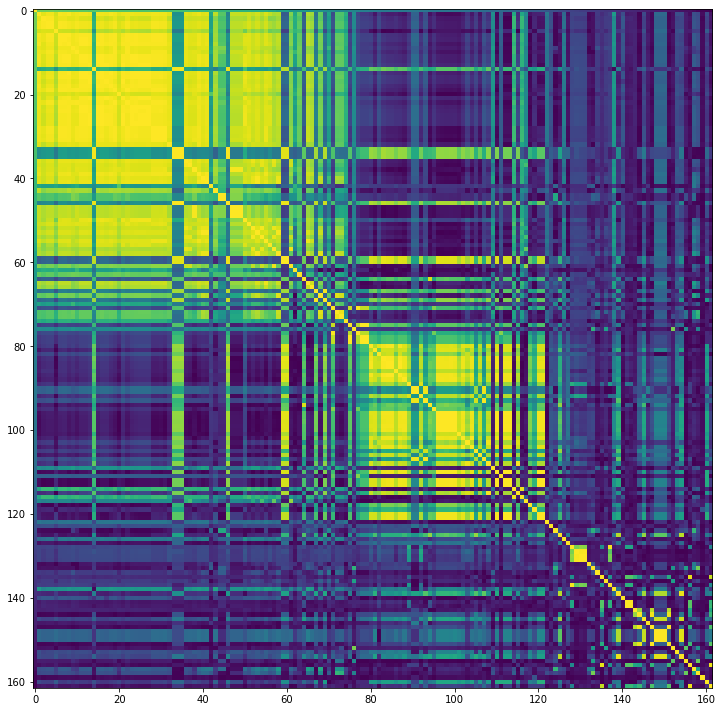

In [3]:

train_df = pd.read_csv('./temp/train_feature_df_outliers.csv')
corr_df = train_df.corr().abs()
corr_df.sort_values(by = ["num_cycle","temperature"],ascending = False,inplace = True)
corr_df = corr_df.loc[:,corr_df.index.values]
corr_df.to_csv("temp/coelationship_outliners.csv",index = True)
# plot
im =np.abs(corr_df.values) 
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.tight_layout()
plt.savefig('temp/correlationship'+'.png')

# delete duplicated columns

In [4]:
CORR_TRESH1 = 0.99
CORR_TRESH2 = 0.7
# collect the duplicate cols
corr_df = pd.read_csv("temp/coelationship_outliners.csv",index_col= 0)
cols = corr_df.columns.values
del_cols = []
for i in range(cols.size):
    for j in range(i+1,cols.size,1):
        if(corr_df.iloc[i,j]>CORR_TRESH1):
            if(cols[j] not in del_cols):
                del_cols.append(cols[j])
print("duplicated cols:",len(del_cols))
l = [i for i in corr_df.index.values if i not in del_cols]
corr_df = corr_df.loc[l,l]  # select in first time
corr_df.to_csv("./temp/coelationship_outliners_dedup.csv",index = True)
# delete low corr rate cols
l = corr_df.index.to_series()
x = corr_df.loc[:,'num_cycle']>CORR_TRESH2
cols = l[x].values
corr_df = corr_df.loc[cols,cols]  # select in first time
corr_df.to_csv("./temp/coelationship_outliners_dedup_delow.csv",index = True)
print("feature length:",len(cols)-1)
print(cols)
corr_df.head()

duplicated cols: 55
feature length: 10
['num_cycle' 'down_collectorEmitterVoltage_llr'
 'down_collectorEmitterVoltage_sra'
 'down_collectorEmitterVoltage_quantile75' 'down_P_mean' 'down_P_arv'
 'up_collectorEmitterVoltage_llr' 'down_gateEmitterVoltage_kurt'
 'down_P_kurt' 'up_collectorEmitterVoltage_std' 'down_P_max']


,num_cycle,down_collectorEmitterVoltage_llr,down_collectorEmitterVoltage_sra,down_collectorEmitterVoltage_quantile75,down_P_mean,down_P_arv,up_collectorEmitterVoltage_llr,down_gateEmitterVoltage_kurt,down_P_kurt,up_collectorEmitterVoltage_std,down_P_max
num_cycle,1.000000,0.789841,0.788706,0.773769,0.755358,0.755354,0.744328,0.737991,0.710080,0.708403,0.703266
down_collectorEmitterVoltage_llr,0.789841,1.000000,0.958578,0.936831,0.965573,0.974313,0.612665,0.955325,0.956186,0.502446,0.955088
down_collectorEmitterVoltage_sra,0.788706,0.958578,1.000000,0.948460,0.953934,0.967005,0.626633,0.923522,0.901110,0.524953,0.928303
down_collectorEmitterVoltage_quantile75,0.773769,0.936831,0.948460,1.000000,0.906445,0.927628,0.519274,0.902448,0.869996,0.412421,0.889885
down_P_mean,0.755358,0.965573,0.953934,0.906445,1.000000,0.988175,0.646297,0.935012,0.957712,0.541351,0.957687


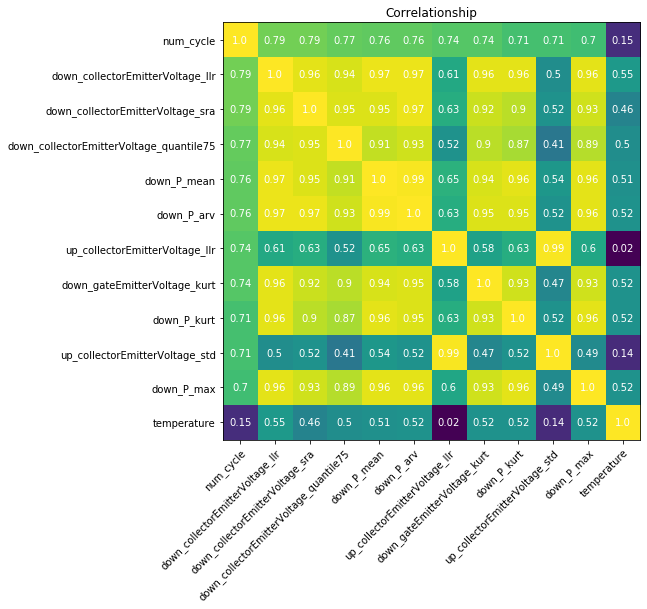

In [5]:
from myHeatMap import *

corr_df = pd.read_csv("./temp/coelationship_outliners_dedup_delow.csv",index_col = 0)
cols = corr_df.index.to_series().values
if 'temperature' not in cols:
    cols = np.append(cols,'temperature')

train_df = pd.read_csv('./temp/train_feature_df_outliers.csv')
feature_df = train_df.loc[:,cols]
feature_df.to_csv('./temp/train_feature_df_outliers_useful.csv',index = False)
corr_df = feature_df.corr().abs()
corr_df.to_csv("temp/correlationship_useful_features.csv")
# plot
im =np.abs(corr_df.values) 
im = im.round(2)
myHeatMap(im,cols,cols)

# scale

In [6]:
# std
train_df = pd.read_csv('./temp/train_feature_df_outliers_useful.csv')
print(train_df.shape)
# drop_duplicates
target = ["temperature","num_cycle"]
cols_to_use = [c for c in cols if c not in target]
for col in cols_to_use:
    ma = train_df[col].max()
    mi = train_df[col].min()
    train_df[col] = (train_df[col]-mi)/(ma-mi)
    
train_df.to_csv("temp/train_feature_df_outliers_useful_scale.csv",index = False)
print(train_df.shape)
train_df.head()

(376, 12)
(376, 12)


,num_cycle,down_collectorEmitterVoltage_llr,down_collectorEmitterVoltage_sra,down_collectorEmitterVoltage_quantile75,down_P_mean,down_P_arv,up_collectorEmitterVoltage_llr,down_gateEmitterVoltage_kurt,down_P_kurt,up_collectorEmitterVoltage_std,down_P_max,temperature
0,25,0.107931,0.772360,0.607143,0.736835,0.751656,0.113275,0.205645,0.693230,0.881907,0.744695,327.123709
1,26,0.051008,0.998158,0.892857,0.892253,0.891381,0.091271,0.186126,0.755591,0.874295,0.870027,328.040387
2,27,0.044119,1.000000,1.000000,0.927456,0.961513,0.000000,0.077611,0.897430,1.000000,0.911804,326.615163
3,28,0.000000,0.976336,0.892857,1.000000,1.000000,0.019250,0.000000,1.000000,0.979130,1.000000,328.383736
4,29,0.353704,0.567069,0.464286,0.445707,0.445737,0.346827,0.409373,0.451498,0.848040,0.454244,330.298071


In [7]:
X = train_df.loc[:,cols_to_use]


In [8]:
def save_map_df(feature_df,X_reduce, name = "TSNE"):
    map_df = pd.DataFrame()
    map_df['num_cycle'] = feature_df['num_cycle']
    map_df['temperature'] = feature_df['temperature']
    map_df['x'] = 0
    map_df['y'] = 0
    map_df[['x','y']] = X_reduce
    map_df.to_csv('output/'+'map_'+name+'.csv',index = False)
    return map_df

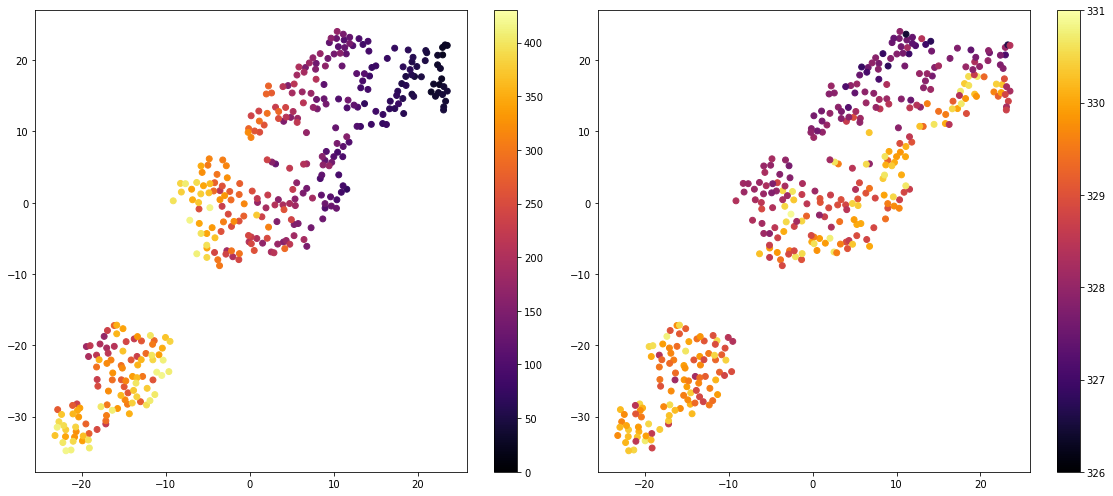

In [9]:
from myScatter import *
# TSNE
# dimension reduce
suffix_str = "TSNE"
tsne = manifold.TSNE(n_components=2, init='random', random_state=1)
X_reduce = tsne.fit_transform(X)
# save map
map_df = save_map_df(train_df,X_reduce,name = suffix_str)
myScatter(map_df,suffix_str)

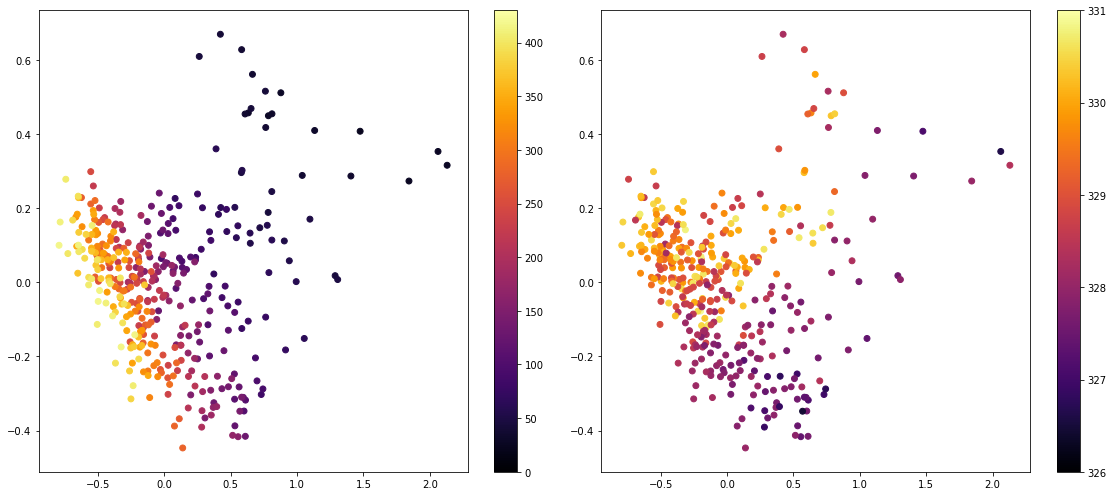

In [10]:
# PCA
suffix_str = "PCA"
pca = decomposition.PCA(n_components = 2)
X_reduce = pca.fit_transform(X)
# save map
map_df = save_map_df(train_df,X_reduce,name = suffix_str)
myScatter(map_df,suffix_str)

In [11]:
map_df.head()

,num_cycle,temperature,x,y
0,25,327.123709,1.475476,0.408124
1,26,328.040387,1.843296,0.273682
2,27,326.615163,2.062201,0.353596
3,28,328.383736,2.130844,0.316269
4,29,330.298071,0.784427,0.449963


In [12]:

df = pd.DataFrame()
for theta in range(20,70):
    col = "reduce_"+str(theta)
    df[col] = map_df["x"]*cos(radians(theta))+ map_df["y"]*sin(radians(theta))
df["num_cycle"] = map_df["num_cycle"]    
df.head()

,reduce_20,reduce_21,reduce_22,reduce_23,reduce_24,reduce_25,reduce_26,reduce_27,reduce_28,reduce_29,...,reduce_61,reduce_62,reduce_63,reduce_64,reduce_65,reduce_66,reduce_67,reduce_68,reduce_69,num_cycle
0,1.526080,1.523734,1.520923,1.517649,1.513913,1.509716,1.505059,1.499943,1.494370,1.488343,...,1.072278,1.053046,1.033493,1.013626,0.993449,0.972970,0.952195,0.931129,0.909780,25
1,1.825737,1.818944,1.811598,1.803699,1.795251,1.786257,1.776718,1.766638,1.756020,1.744867,...,1.133016,1.107022,1.080692,1.054032,1.027051,0.999757,0.972159,0.944265,0.916083,26
2,2.058772,2.051948,2.044499,2.036427,2.027735,2.018425,2.008500,1.997964,1.986819,1.975068,...,1.309037,1.280351,1.251276,1.221819,1.191990,1.161799,1.131253,1.100362,1.069137,27
3,2.110509,2.102655,2.094161,2.085029,2.075262,2.064862,2.053834,2.042180,2.029903,2.017009,...,1.309669,1.279620,1.249181,1.218362,1.187171,1.155619,1.123715,1.091468,1.058889,28
4,0.891017,0.893578,0.895867,0.897883,0.899626,0.901095,0.902289,0.903208,0.903853,0.904222,...,0.773844,0.765560,0.757042,0.748294,0.739318,0.730117,0.720693,0.711050,0.701190,29


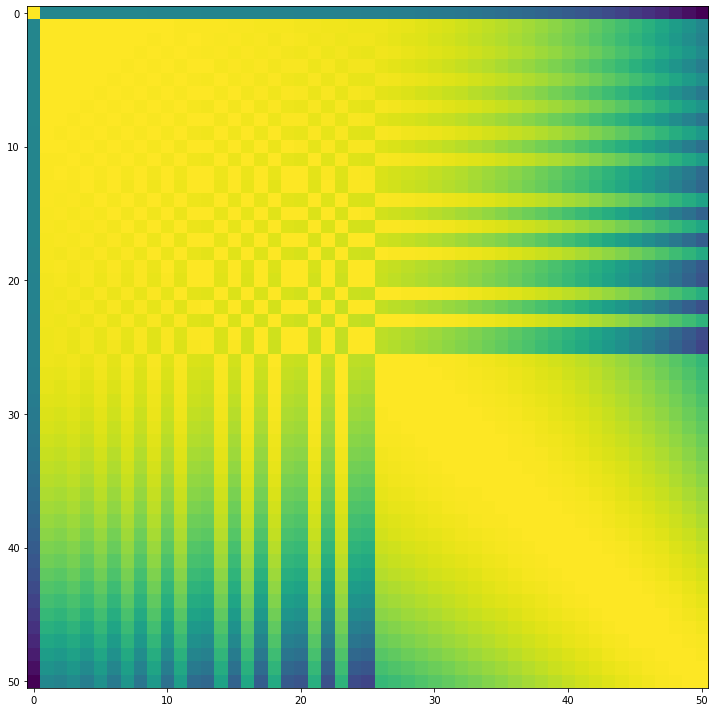

In [13]:
corr_df = df.corr().abs()
corr_df.sort_values(by = ["num_cycle"],ascending = False,inplace = True)
corr_df = corr_df.loc[:,corr_df.index.values]
# plot
im =np.abs(corr_df.values) 
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.tight_layout()
# plt.savefig('temp/correlationship'+'.png')

In [23]:
corr_df.head()

,num_cycle,reduce_34,reduce_33,reduce_35,reduce_32,reduce_36,reduce_31,reduce_37,reduce_30,reduce_38,...,reduce_60,reduce_61,reduce_62,reduce_63,reduce_64,reduce_65,reduce_66,reduce_67,reduce_68,reduce_69
num_cycle,1.000000,0.852428,0.852400,0.852375,0.852298,0.852239,0.852124,0.852014,0.851882,0.851695,...,0.801272,0.795502,0.789219,0.782385,0.774955,0.766886,0.758128,0.748632,0.738343,0.727207
reduce_34,0.852428,1.000000,0.999954,0.999953,0.999821,0.999807,0.999604,0.999558,0.999307,0.999198,...,0.940474,0.933731,0.926387,0.918397,0.909709,0.900272,0.890027,0.878917,0.866878,0.853846
reduce_33,0.852400,0.999954,1.000000,0.999814,0.999956,0.999574,0.999827,0.999228,0.999617,0.998770,...,0.937185,0.930270,0.922749,0.914576,0.905702,0.896073,0.885633,0.874322,0.862078,0.848836
reduce_35,0.852375,0.999953,0.999814,1.000000,0.999589,0.999951,0.999283,0.999800,0.998898,0.999540,...,0.943735,0.937168,0.930006,0.922201,0.913705,0.904463,0.894419,0.883514,0.871685,0.858868
reduce_32,0.852298,0.999821,0.999956,0.999589,1.000000,0.999256,0.999957,0.998816,0.999833,0.998261,...,0.933871,0.926786,0.919092,0.910742,0.901685,0.891869,0.881237,0.869729,0.857285,0.843838


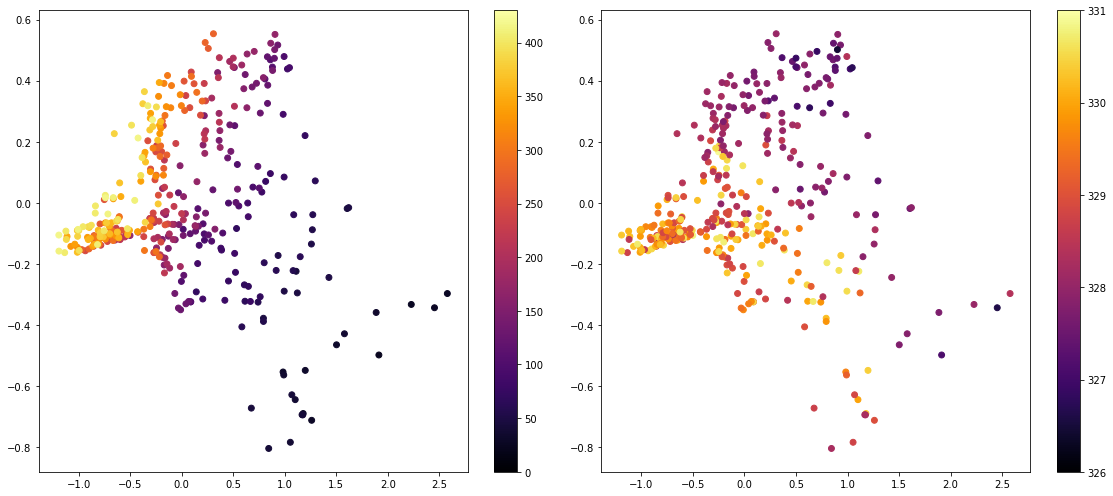

In [14]:
# Isomap
suffix_str = "Isomap"
Isomap = manifold.Isomap(n_neighbors = 8 , n_components = 2)
X_reduce = Isomap.fit_transform(X)
map_df = save_map_df(train_df,X_reduce,name = suffix_str)
myScatter(map_df,suffix_str)

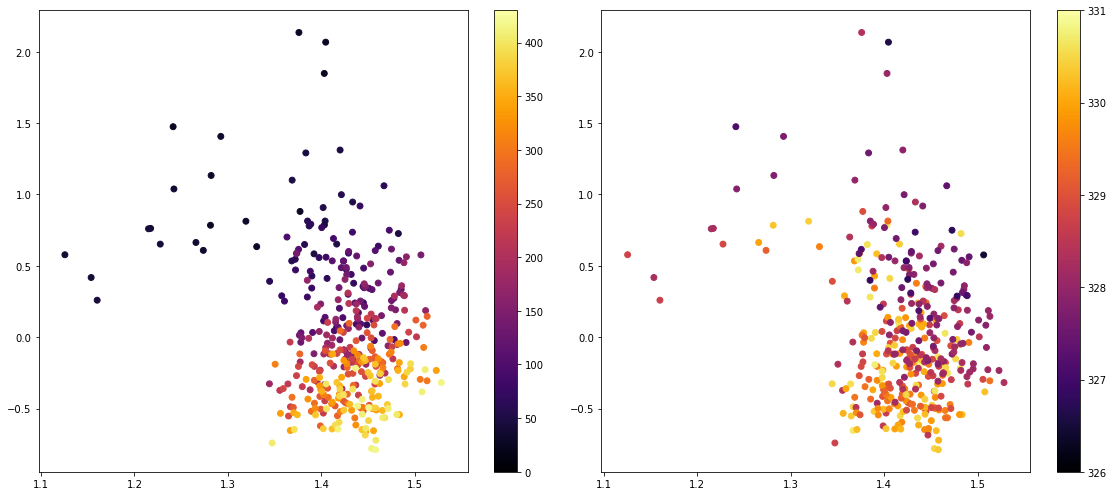

In [15]:
suffix_str = "SVD"
SVD = decomposition.TruncatedSVD(n_components=2)
X_reduce = SVD.fit_transform(X)
map_df = save_map_df(train_df,X_reduce,name = suffix_str)
myScatter(map_df,suffix_str)

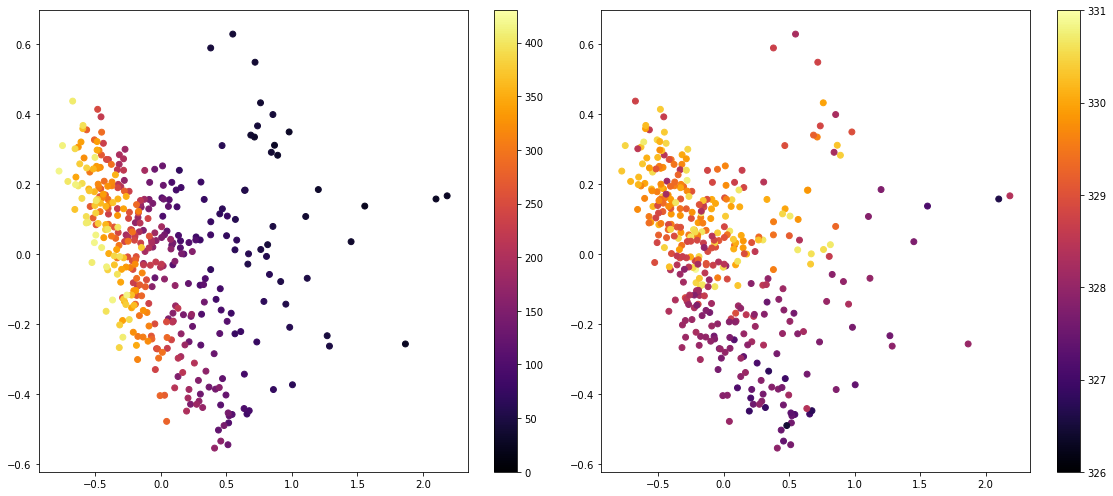

In [16]:
# MDS
mds = manifold.MDS(n_components=2)
X_reduce = mds.fit_transform(X)
suffix_str = "MDS"
map_df = save_map_df(train_df,X_reduce,name = suffix_str)
myScatter(map_df,suffix_str)

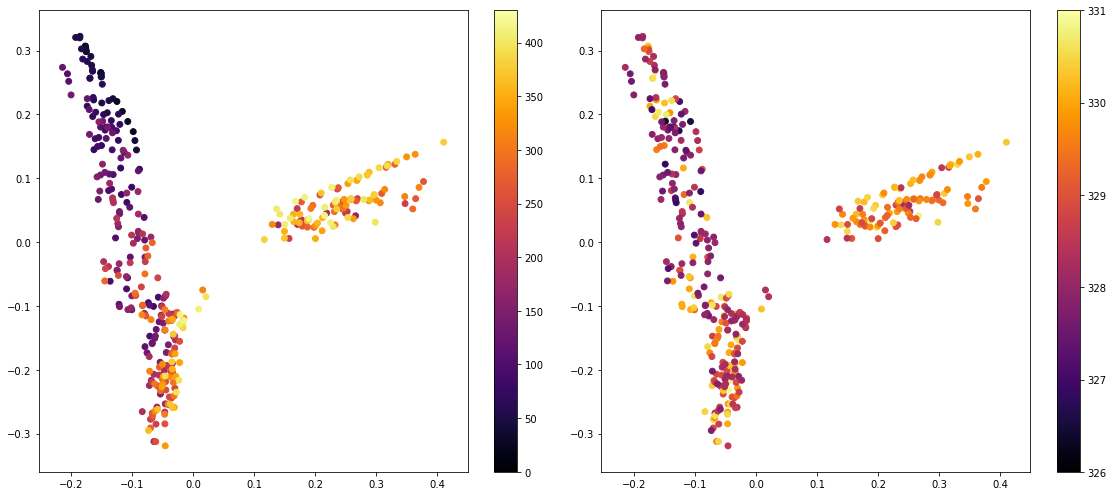

In [17]:
# SpectralEmbedding
se = manifold.SpectralEmbedding(n_components= 2, n_neighbors= 10)
X_reduce = se.fit_transform(X)
suffix_str = "SpectralEmbedding"
map_df = save_map_df(train_df,X_reduce,name = suffix_str)
myScatter(map_df,suffix_str)

# test stationarity

In [18]:
from mylab.myteststationary import *

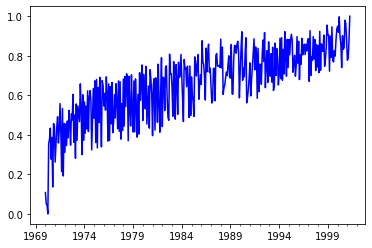

In [19]:
# import test_stationarity
train_df = pd.read_csv("temp/train_feature_df_outliers_useful_scale.csv")
ts = train_df.down_collectorEmitterVoltage_llr
ts.index = pd.DatetimeIndex(start=0,periods=len(ts.values),freq='MS')
# ts_log = np.log(ts)
draw_ts(ts)

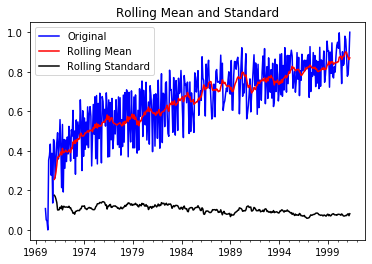

In [20]:
draw_trend(ts, 12)

In [21]:
diff_12 = ts.diff(12)
diff_12.dropna(inplace=True)
diff_12_1 = diff_12.diff(1)
diff_12_1.dropna(inplace=True)
test_stationarity(diff_12_1)

Test Statistic                -8.850218e+00
p-value                        1.580352e-14
#Lags Used                     1.700000e+01
Number of Observations Used    3.450000e+02
Critical Value (1%)           -3.449447e+00
Critical Value (5%)           -2.869954e+00
Critical Value (10%)          -2.571253e+00
dtype: float64

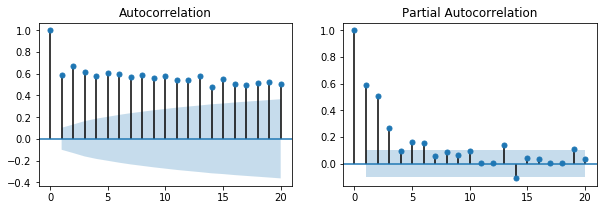

NameError: name 'testStationarity' is not defined

In [22]:
draw_acf_pacf(ts,20)
testStationarity(ts)

In [ ]:
ts_diff1 = ts.diff(1)
ts_diff1.dropna(inplace=True)
draw_acf_pacf(ts_diff1,20)
testStationarity(ts_diff1)

In [ ]:
ts_diff1.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts, model="additive")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
draw_ts(trend)
draw_ts(seasonal)
draw_ts(residual)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_diff1, model="additive")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
draw_ts(trend)
draw_ts(seasonal)
draw_ts(residual)

In [ ]:
t = train_df.temperature
t.index = pd.DatetimeIndex(start=0,periods=len(ts.values),freq='MS')
decomposition = seasonal_decompose(t, model="additive")

t_trend = decomposition.trend
t_seasonal = decomposition.seasonal
t_residual = decomposition.resid
draw_ts(t_trend)
draw_ts(t_seasonal)
draw_ts(t_residual)

In [ ]:
a = ts-(t-290)*0.05
draw_ts(a)
decomposition = seasonal_decompose(a, model="additive")
t_trend = decomposition.trend
t_seasonal = decomposition.seasonal
t_residual = decomposition.resid
draw_ts(t_trend)
draw_ts(t_seasonal)
draw_ts(t_residual)

In [ ]:

rol_mean = ts_log.rolling(window=12).mean()
rol_mean.dropna(inplace=True)
ts_diff_1 = rol_mean.diff(1)
ts_diff_1.dropna(inplace=True)
teststationarity(ts_diff_1


In [ ]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(ts_diff1, order=(1, 1)) 
result_arma = model.fit( disp=-1, method='css')

In [ ]:
predict_ts = result_arma.predict()
# 一阶差分还原
diff_shift_ts = ts_diff_1.shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)
# 再次一阶差分还原
rol_shift_ts = rol_mean.shift(1)
diff_recover = diff_recover_1.add(rol_shift_ts)
# 移动平均还原
rol_sum = ts_log.rolling(window=11).sum()
rol_recover = diff_recover*12 - rol_sum.shift(1)
# 对数还原
log_recover = np.exp(rol_recover)
log_recover.dropna(inplace=True)

In [ ]:
ts = ts[log_recover.index]  # 过滤没有预测的记录
plt.figure(facecolor='white')
log_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
plt.show()

In [ ]:
# 差分操作
def diff_ts(ts, d):
    global shift_ts_list
    #  动态预测第二日的值时所需要的差分序列
    global last_data_shift_list
    shift_ts_list = []
    last_data_shift_list = []
    tmp_ts = ts
    for i in d:
        last_data_shift_list.append(tmp_ts[-i])
        print last_data_shift_list
        shift_ts = tmp_ts.shift(i)
        shift_ts_list.append(shift_ts)
        tmp_ts = tmp_ts - shift_ts
    tmp_ts.dropna(inplace=True)
    return tmp_ts

# 还原操作
def predict_diff_recover(predict_value, d):
    if isinstance(predict_value, float):
        tmp_data = predict_value
        for i in range(len(d)):
            tmp_data = tmp_data + last_data_shift_list[-i-1]
    elif isinstance(predict_value, np.ndarray):
        tmp_data = predict_value[0]
        for i in range(len(d)):
            tmp_data = tmp_data + last_data_shift_list[-i-1]
    else:
        tmp_data = predict_value
        for i in range(len(d)):
            try:
                tmp_data = tmp_data.add(shift_ts_list[-i-1])
            except:
                raise ValueError('What you input is not pd.Series type!')
        tmp_data.dropna(inplace=True)
    return tmp_data